Medians, deviations from random p-value, and significance for each category:
Category: B1-B1, Median: 0.1627, p-value (Z-test): 8.9678e-01 ()
Category: B1-B2, Median: 0.7359, p-value (Z-test): 2.0834e-37 (***)
Category: B1-U, Median: 0.0034, p-value (Z-test): 5.6075e-11 (***)
Category: B2-B2, Median: 0.0713, p-value (Z-test): 9.5258e-04 (***)
Category: B2-U, Median: 0.0031, p-value (Z-test): 5.1023e-11 (***)
Category: U-U, Median: 0.0020, p-value (Z-test): 3.3149e-11 (***)


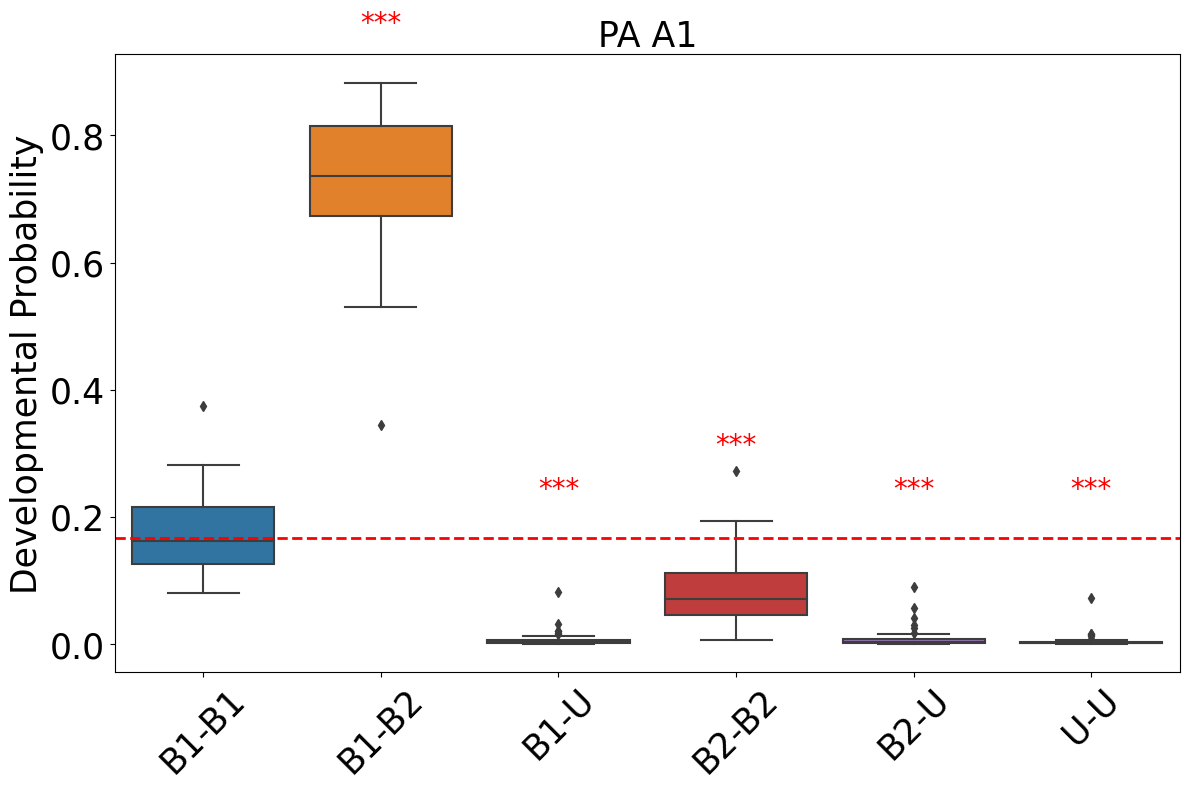

In [50]:
#3分类 PA A1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Load data
file_path = 'PA-c1-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.167

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = medians.index

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('PA A1', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.show()


Medians, deviations from random p-value, and significance for each category:
Category: B1-B1, Median: 0.3621, p-value (Z-test): 7.6226e-07 (***)
Category: B1-B2, Median: 0.3179, p-value (Z-test): 8.2676e-05 (***)
Category: B1-U, Median: 0.0505, p-value (Z-test): 2.8545e-05 (***)
Category: B2-B2, Median: 0.1464, p-value (Z-test): 5.2553e-01 ()
Category: B2-U, Median: 0.0599, p-value (Z-test): 1.5949e-04 (***)
Category: U-U, Median: 0.0182, p-value (Z-test): 9.6401e-09 (***)


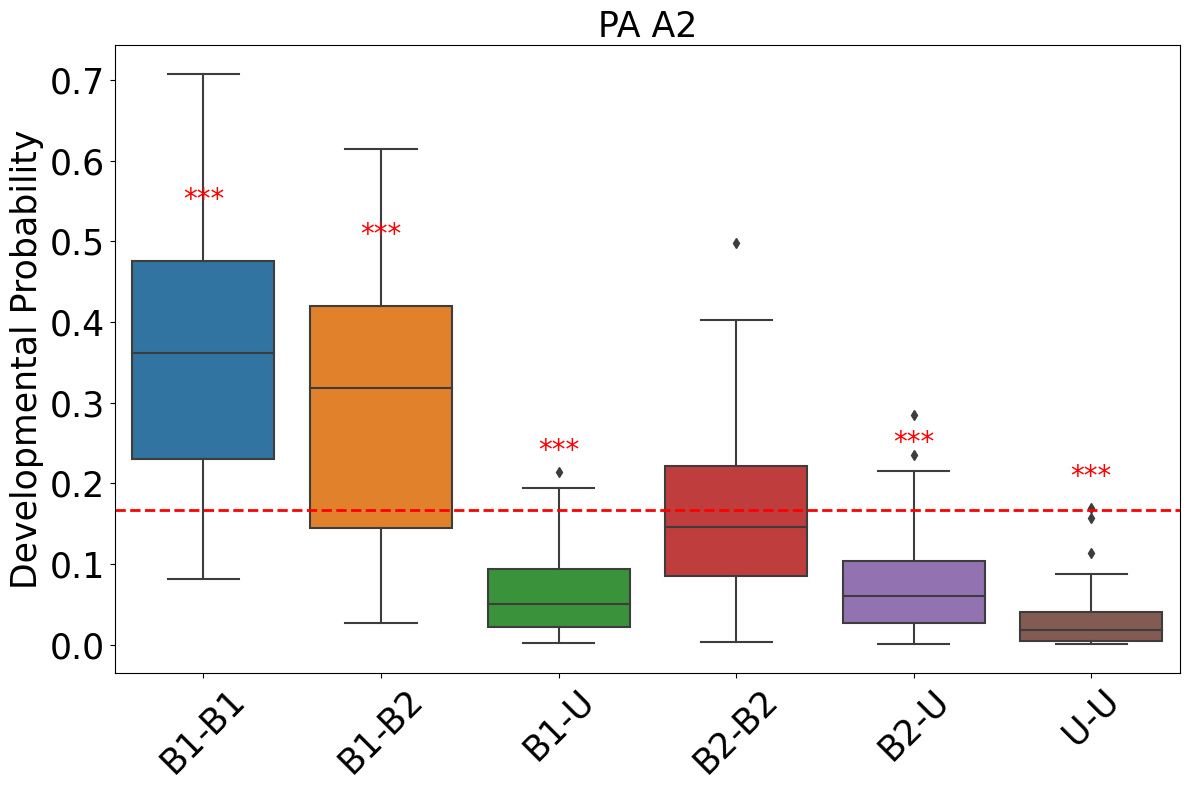

In [51]:
#3分类 PA A2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Load data
file_path = 'PA-c2-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.167

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = medians.index

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('PA A2', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.show()


Medians, deviations from random p-value, and significance for each category:
Category: B1-B1, Median: 0.1672, p-value (Z-test): 9.9451e-01 ()
Category: B1-B2, Median: 0.1989, p-value (Z-test): 3.5582e-01 ()
Category: B1-U, Median: 0.1556, p-value (Z-test): 7.2943e-01 ()
Category: B2-B2, Median: 0.1563, p-value (Z-test): 7.4621e-01 ()
Category: B2-U, Median: 0.1201, p-value (Z-test): 1.3514e-01 ()
Category: U-U, Median: 0.1414, p-value (Z-test): 4.2782e-01 ()


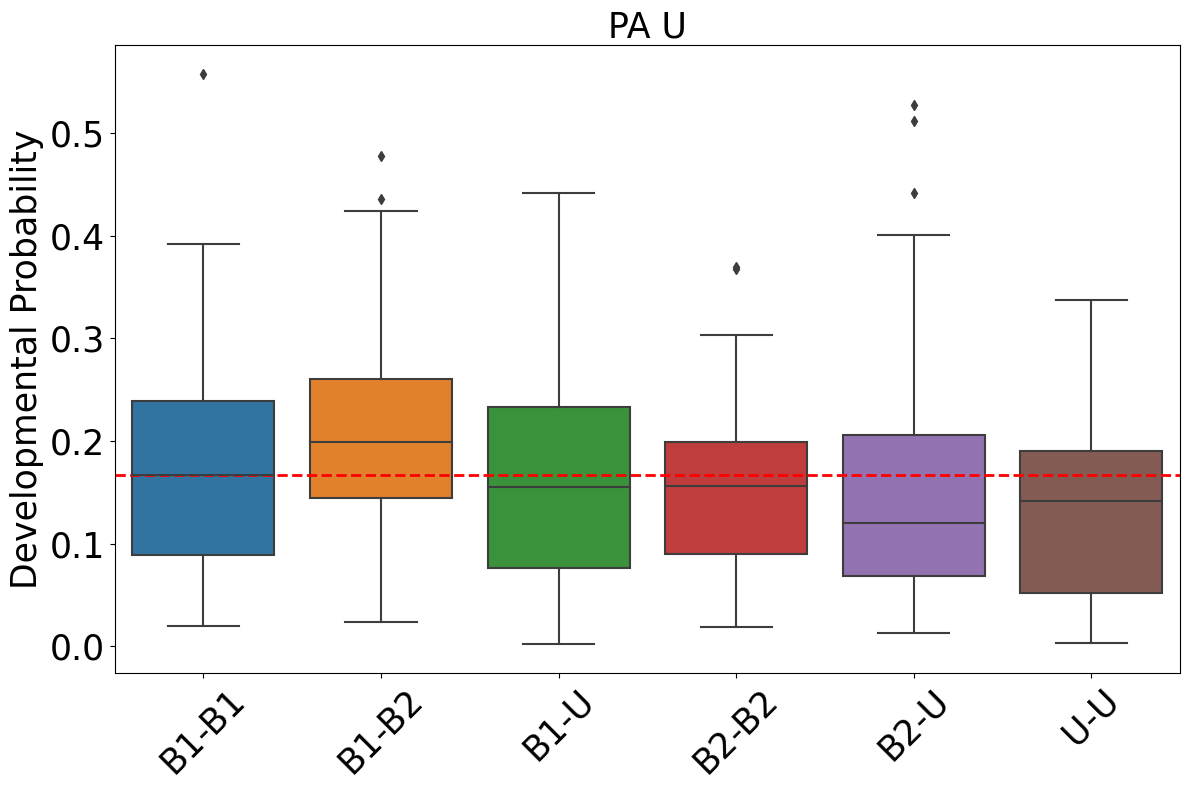

In [52]:
#3分类 PA un
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Load data
file_path = 'PA-c3-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.167

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = medians.index

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('PA U', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.show()


Medians, deviations from random p-value, and significance for each category:
Category: D1-D1, Median: 0.0851, p-value (Z-test): 5.7721e-03 (**)
Category: D1-D2, Median: 0.7434, p-value (Z-test): 2.6151e-38 (***)
Category: D1-U, Median: 0.0187, p-value (Z-test): 1.1116e-08 (***)
Category: D2-D2, Median: 0.1193, p-value (Z-test): 1.2758e-01 ()
Category: D2-U, Median: 0.0225, p-value (Z-test): 3.5097e-08 (***)
Category: U-U, Median: 0.0075, p-value (Z-test): 2.6113e-10 (***)


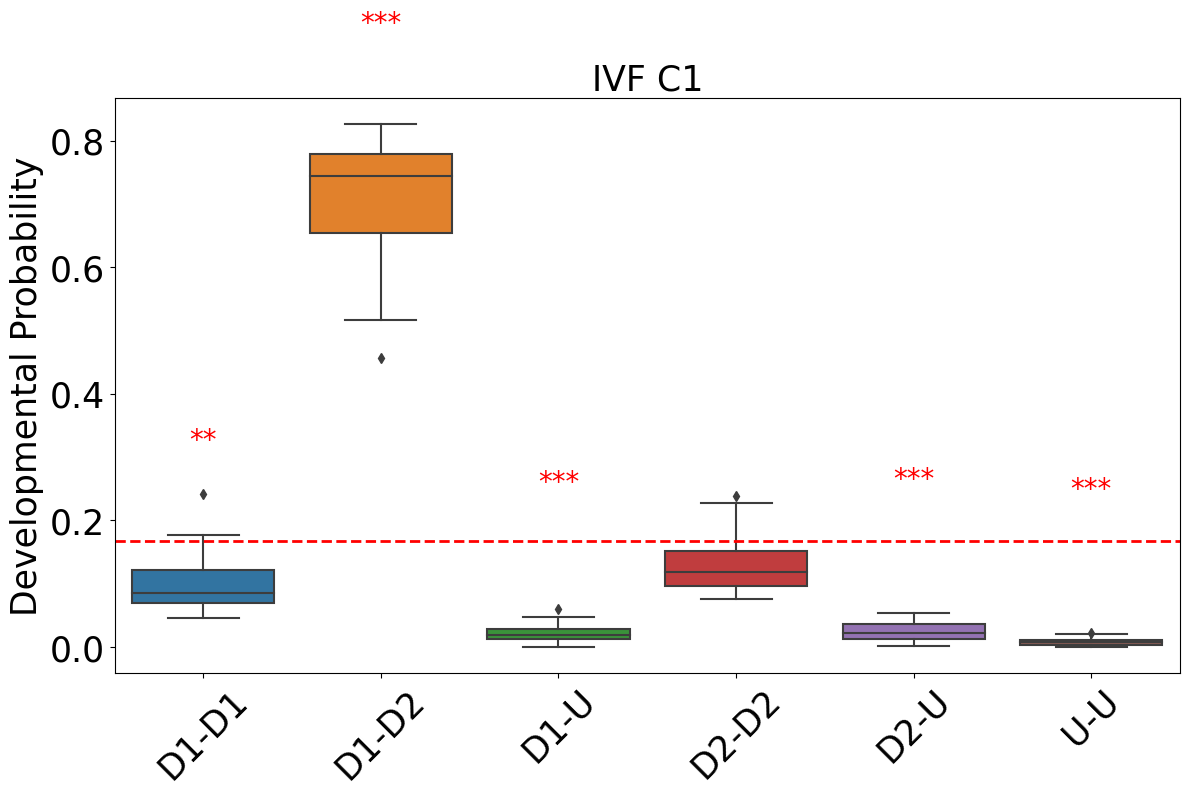

In [8]:
#3分类 IVF C1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Load data
file_path = 'IVF-3C-C1-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.167

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = medians.index

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('IVF C1', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.show()


Medians, deviations from random p-value, and significance for each category:
Category: D1-D1, Median: 0.1787, p-value (Z-test): 7.3004e-01 ()
Category: D1-D2, Median: 0.1813, p-value (Z-test): 6.7334e-01 ()
Category: D1-U, Median: 0.1502, p-value (Z-test): 6.0766e-01 ()
Category: D2-D2, Median: 0.1686, p-value (Z-test): 9.6065e-01 ()
Category: D2-U, Median: 0.1484, p-value (Z-test): 5.6723e-01 ()
Category: U-U, Median: 0.1474, p-value (Z-test): 5.4788e-01 ()


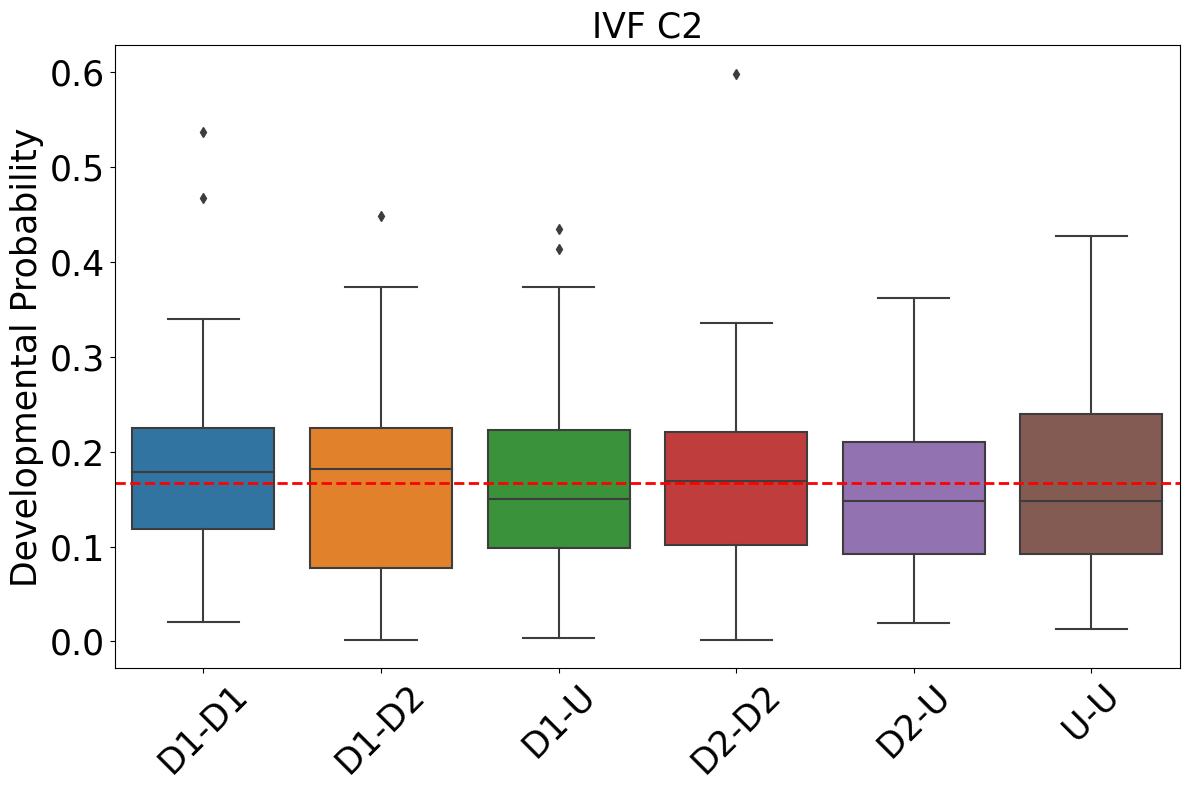

In [9]:
#3分类 IVF C2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Load data
file_path = 'IVF-3C-C2-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.167

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = medians.index

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('IVF C2', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.show()


Medians, deviations from random p-value, and significance for each category:
Category: B1-B1, Median: 0.1847, p-value (Z-test): 6.0295e-01 ()
Category: B1-B2, Median: 0.1733, p-value (Z-test): 8.5092e-01 ()
Category: B1-U, Median: 0.1460, p-value (Z-test): 5.1908e-01 ()
Category: B2-B2, Median: 0.1450, p-value (Z-test): 4.9842e-01 ()
Category: B2-U, Median: 0.1543, p-value (Z-test): 6.9846e-01 ()
Category: U-U, Median: 0.1435, p-value (Z-test): 4.6849e-01 ()


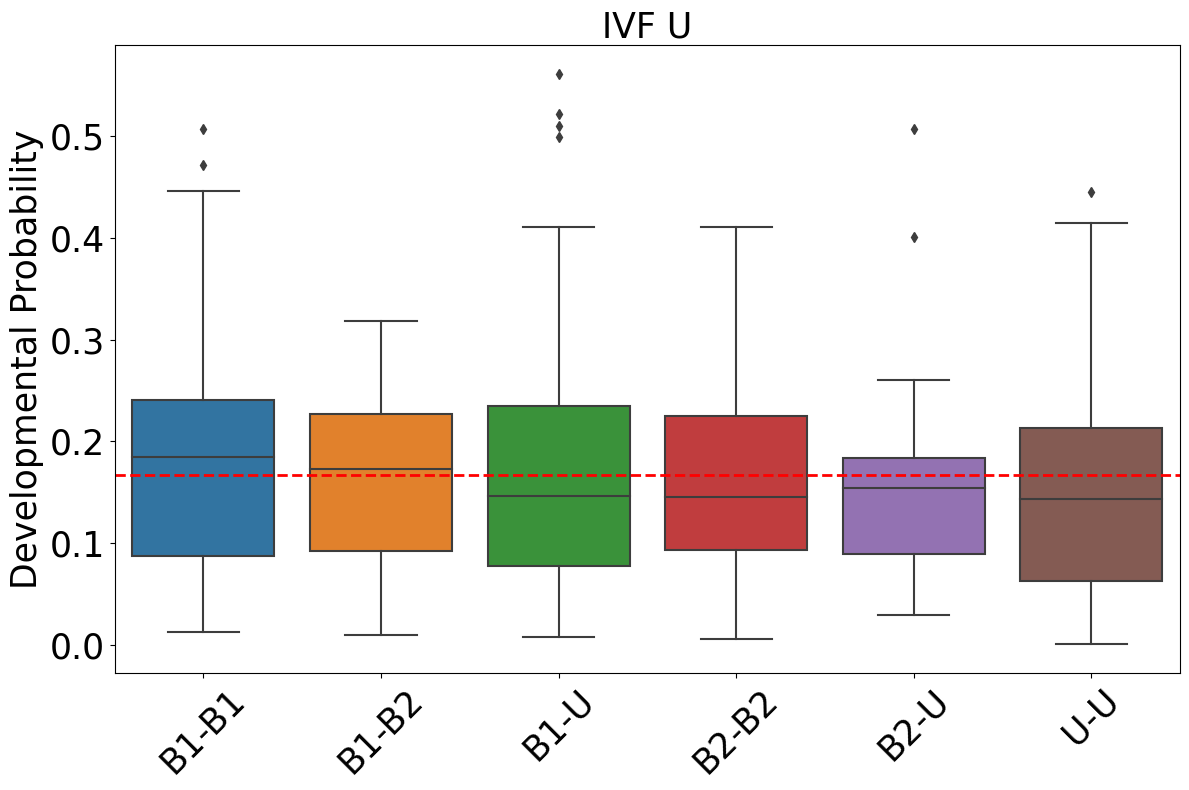

In [55]:
#3分类 IVF U
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Load data
file_path = 'IVF-c3-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.167

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = medians.index

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('IVF U', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.show()


Medians, deviations from random p-value, and significance for each category:
Category: F-F, Median: 0.2147, p-value (Z-test): 4.2936e-04 (***)
Category: H1-F, Median: 0.2042, p-value (Z-test): 1.1782e-03 (**)
Category: H1-H1, Median: 0.0437, p-value (Z-test): 1.4769e-02 (*)
Category: H1-H2, Median: 0.1116, p-value (Z-test): 6.7259e-01 ()
Category: H1-U, Median: 0.0113, p-value (Z-test): 1.5279e-05 (***)
Category: H2-F, Median: 0.1821, p-value (Z-test): 8.3915e-03 (**)
Category: H2-H2, Median: 0.1076, p-value (Z-test): 7.8161e-01 ()
Category: H2-U, Median: 0.0109, p-value (Z-test): 1.3631e-05 (***)
Category: U-F, Median: 0.0134, p-value (Z-test): 2.8331e-05 (***)
Category: U-U, Median: 0.0075, p-value (Z-test): 4.4686e-06 (***)


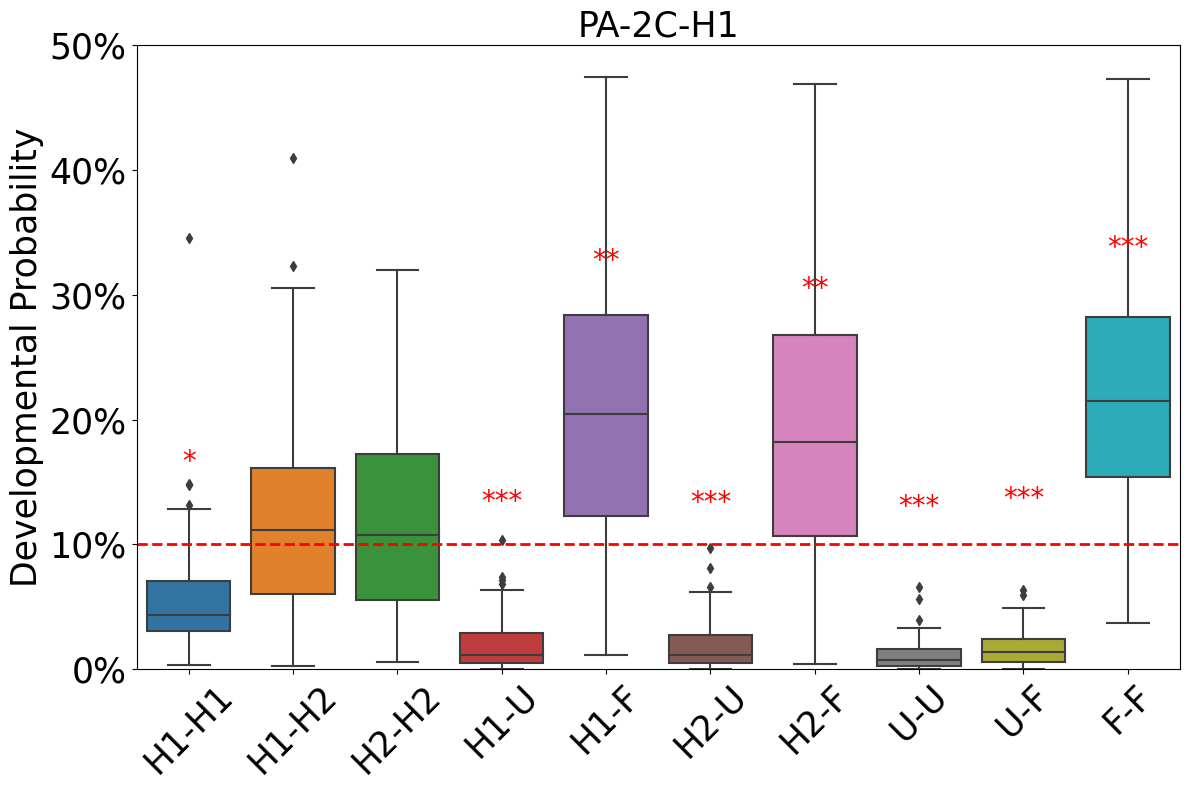

In [8]:
#4分类 PA-2C-H1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# Load data
file_path = 'PA-2C-H1-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.1

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = data.columns.tolist()

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)

# 设置 y 轴为百分比
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('PA-2C-H1', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0, 0.5)  # 限制 y 轴范围为 0 到 0.5（即 0% 到 50%）

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.savefig('PA_2C_H1_Probability.svg', dpi=300, bbox_inches='tight', transparent=True)


Medians, deviations from random p-value, and significance for each category:
Category: F-F, Median: 0.1560, p-value (Z-test): 6.0931e-02 ()
Category: H1-F, Median: 0.1751, p-value (Z-test): 1.4722e-02 (*)
Category: H1-H1, Median: 0.1302, p-value (Z-test): 2.9045e-01 ()
Category: H1-H2, Median: 0.1049, p-value (Z-test): 8.5660e-01 ()
Category: H1-U, Median: 0.0130, p-value (Z-test): 2.5158e-05 (***)
Category: H2-F, Median: 0.1408, p-value (Z-test): 1.6122e-01 ()
Category: H2-H2, Median: 0.1507, p-value (Z-test): 8.6681e-02 ()
Category: H2-U, Median: 0.0173, p-value (Z-test): 8.2704e-05 (***)
Category: U-F, Median: 0.0158, p-value (Z-test): 5.6206e-05 (***)
Category: U-U, Median: 0.0065, p-value (Z-test): 3.2430e-06 (***)


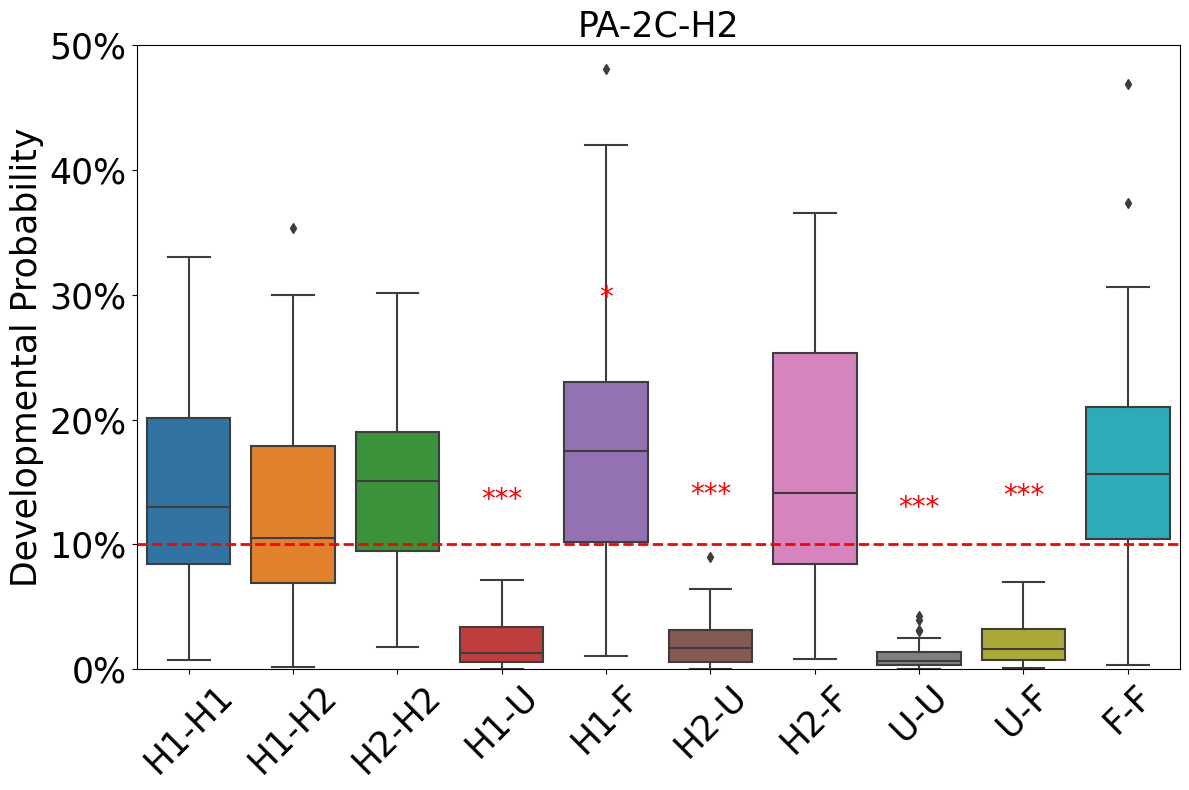

In [9]:
#4分类 PA-2C-H2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# Load data
file_path = 'PA-2C-H2-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.1

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = data.columns.tolist()

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)

# 设置 y 轴为百分比
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('PA-2C-H2', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0, 0.5)  # 限制 y 轴范围为 0 到 0.5（即 0% 到 50%）
# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.savefig('PA_2C_H2_Probability.svg', dpi=300, bbox_inches='tight', transparent=True)


Medians, deviations from random p-value, and significance for each category:
Category: F-F, Median: 0.1724, p-value (Z-test): 1.8343e-02 (*)
Category: H1-F, Median: 0.3262, p-value (Z-test): 6.5581e-10 (***)
Category: H1-H1, Median: 0.0998, p-value (Z-test): 9.9361e-01 ()
Category: H1-H2, Median: 0.1277, p-value (Z-test): 3.2935e-01 ()
Category: H1-U, Median: 0.0053, p-value (Z-test): 2.1138e-06 (***)
Category: H2-F, Median: 0.1569, p-value (Z-test): 5.7264e-02 ()
Category: H2-H2, Median: 0.0427, p-value (Z-test): 1.2874e-02 (*)
Category: H2-U, Median: 0.0048, p-value (Z-test): 1.7577e-06 (***)
Category: U-F, Median: 0.0093, p-value (Z-test): 8.2646e-06 (***)
Category: U-U, Median: 0.0025, p-value (Z-test): 7.5288e-07 (***)


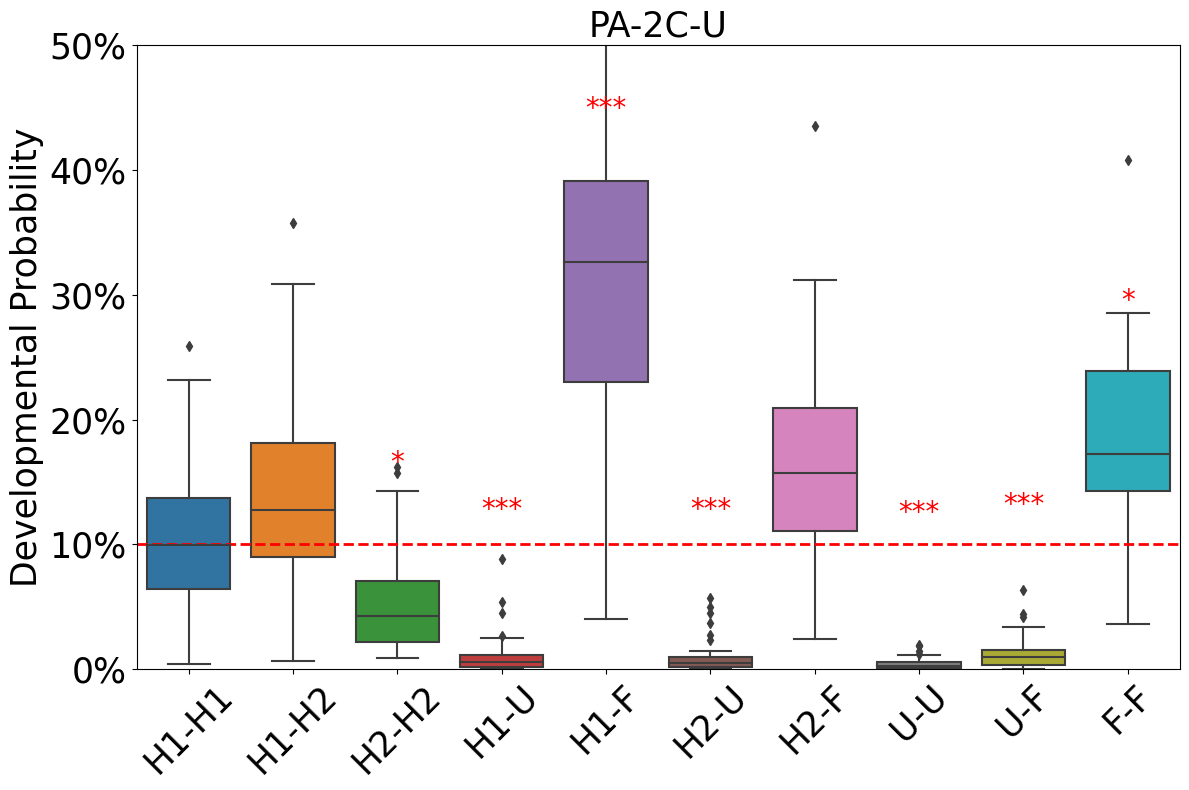

In [10]:
#4分类 PA U
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# Load data
file_path = 'PA-2C-U-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.1

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = data.columns.tolist()

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)
# 设置 y 轴为百分比
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('PA-2C-U', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0, 0.5)  # 限制 y 轴范围为 0 到 0.5（即 0% 到 50%）

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.savefig('PA_2C_U_Probability.svg', dpi=300, bbox_inches='tight', transparent=True)


Medians, deviations from random p-value, and significance for each category:
Category: F-F, Median: 0.1306, p-value (Z-test): 2.8393e-01 ()
Category: H1-F, Median: 0.1342, p-value (Z-test): 2.3489e-01 ()
Category: H1-H1, Median: 0.1320, p-value (Z-test): 2.6444e-01 ()
Category: H1-H2, Median: 0.1021, p-value (Z-test): 9.3699e-01 ()
Category: H1-U, Median: 0.0399, p-value (Z-test): 8.4452e-03 (**)
Category: H2-F, Median: 0.1221, p-value (Z-test): 4.3152e-01 ()
Category: H2-H2, Median: 0.1008, p-value (Z-test): 9.7634e-01 ()
Category: H2-U, Median: 0.0400, p-value (Z-test): 8.5739e-03 (**)
Category: U-F, Median: 0.0336, p-value (Z-test): 2.9440e-03 (**)
Category: U-U, Median: 0.0218, p-value (Z-test): 2.5811e-04 (***)


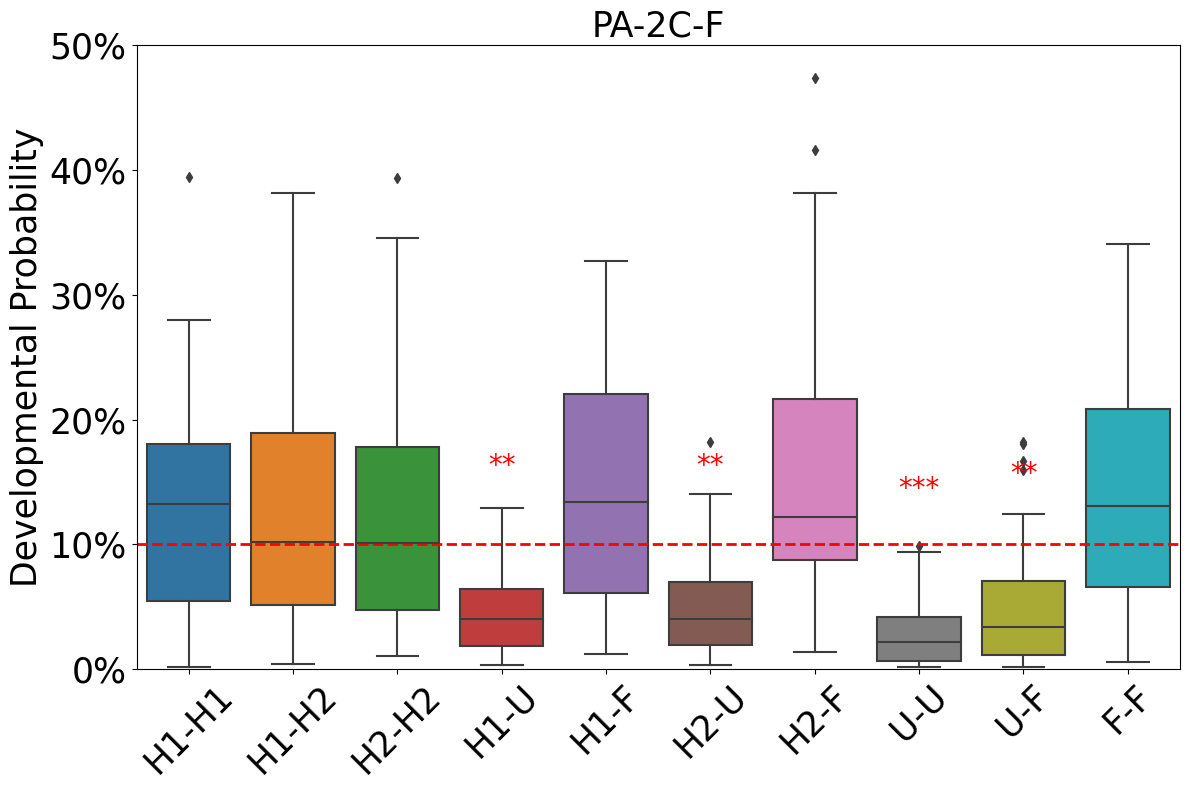

In [11]:
#4分类 PA-2C-F
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# Load data
file_path = 'PA-2C-F-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.1

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = data.columns.tolist()

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)
# 设置 y 轴为百分比
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('PA-2C-F', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0, 0.5)  # 限制 y 轴范围为 0 到 0.5（即 0% 到 50%）

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.savefig('PA_2C_F_Probability.svg', dpi=300, bbox_inches='tight', transparent=True)

Medians, deviations from random p-value, and significance for each category:
Category: F-F, Median: 0.1124, p-value (Z-test): 6.5320e-01 ()
Category: H1-F, Median: 0.1807, p-value (Z-test): 9.3849e-03 (**)
Category: H1-H1, Median: 0.0504, p-value (Z-test): 3.5609e-02 (*)
Category: H1-H2, Median: 0.1760, p-value (Z-test): 1.3751e-02 (*)
Category: H1-U, Median: 0.0213, p-value (Z-test): 2.2933e-04 (***)
Category: H2-F, Median: 0.1870, p-value (Z-test): 5.5353e-03 (**)
Category: H2-H2, Median: 0.1782, p-value (Z-test): 1.1500e-02 (*)
Category: H2-U, Median: 0.0120, p-value (Z-test): 1.8954e-05 (***)
Category: U-F, Median: 0.0113, p-value (Z-test): 1.5185e-05 (***)
Category: U-U, Median: 0.0042, p-value (Z-test): 1.4254e-06 (***)


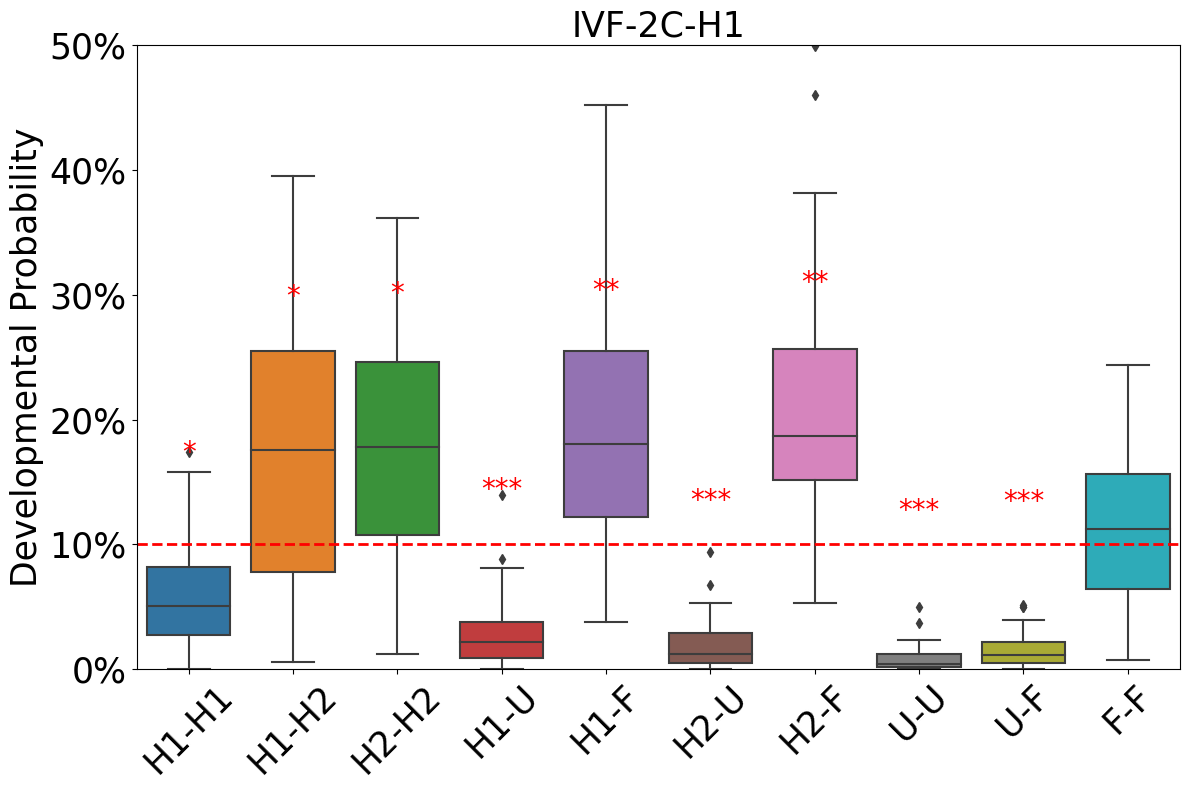

In [13]:
#4分类 IVF-2C-H1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# Load data
file_path = 'IVF-2C-H1-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.1

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = data.columns.tolist()

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)
# 设置 y 轴为百分比
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('IVF-2C-H1', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0, 0.5)  # 限制 y 轴范围为 0 到 0.5（即 0% 到 50%）

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.savefig('IVF_2C_H1_Probability.svg', dpi=300, bbox_inches='tight', transparent=True)

Medians, deviations from random p-value, and significance for each category:
Category: F-F, Median: 0.0909, p-value (Z-test): 7.2937e-01 ()
Category: H1-F, Median: 0.1403, p-value (Z-test): 1.6625e-01 ()
Category: H1-H1, Median: 0.1467, p-value (Z-test): 1.1217e-01 ()
Category: H1-H2, Median: 0.2269, p-value (Z-test): 1.2438e-04 (***)
Category: H1-U, Median: 0.0145, p-value (Z-test): 3.8695e-05 (***)
Category: H2-F, Median: 0.1453, p-value (Z-test): 1.2289e-01 ()
Category: H2-H2, Median: 0.1403, p-value (Z-test): 1.6606e-01 ()
Category: H2-U, Median: 0.0207, p-value (Z-test): 1.9912e-04 (***)
Category: U-F, Median: 0.0136, p-value (Z-test): 3.0167e-05 (***)
Category: U-U, Median: 0.0077, p-value (Z-test): 4.8105e-06 (***)


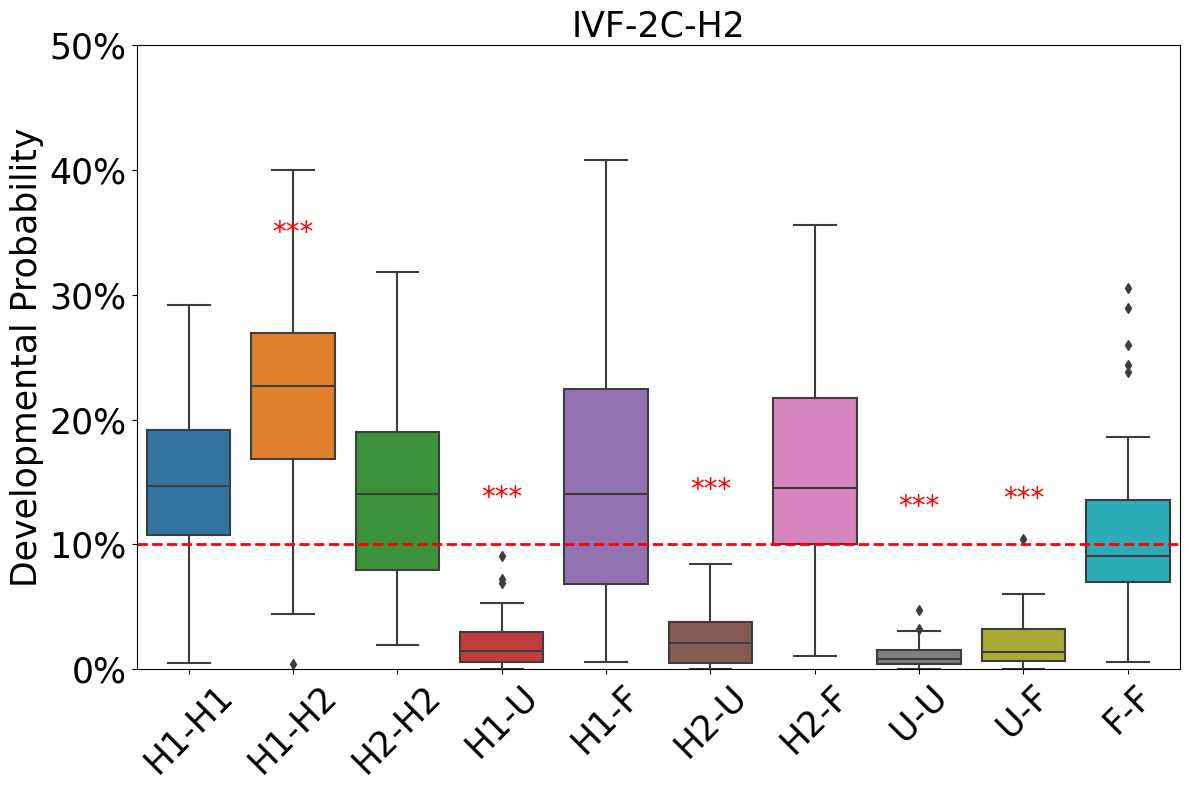

In [15]:
#4分类 IVF-2C-H2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# Load data
file_path = 'IVF-2C-H2-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.1

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = data.columns.tolist()

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)
# 设置 y 轴为百分比
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('IVF-2C-H2', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0, 0.5)  # 限制 y 轴范围为 0 到 0.5（即 0% 到 50%）

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.savefig('IVF_2C_H2_Probability.svg', dpi=300, bbox_inches='tight', transparent=True)


Medians, deviations from random p-value, and significance for each category:
Category: F-F, Median: 0.0925, p-value (Z-test): 7.7593e-01 ()
Category: H1-F, Median: 0.0702, p-value (Z-test): 2.3165e-01 ()
Category: H1-H1, Median: 0.1212, p-value (Z-test): 4.4883e-01 ()
Category: H1-H2, Median: 0.0881, p-value (Z-test): 6.4960e-01 ()
Category: H1-U, Median: 0.0661, p-value (Z-test): 1.7010e-01 ()
Category: H2-F, Median: 0.0749, p-value (Z-test): 3.1998e-01 ()
Category: H2-H2, Median: 0.1035, p-value (Z-test): 8.9812e-01 ()
Category: H2-U, Median: 0.0926, p-value (Z-test): 7.8056e-01 ()
Category: U-F, Median: 0.0578, p-value (Z-test): 7.9830e-02 ()
Category: U-U, Median: 0.0531, p-value (Z-test): 4.8512e-02 (*)


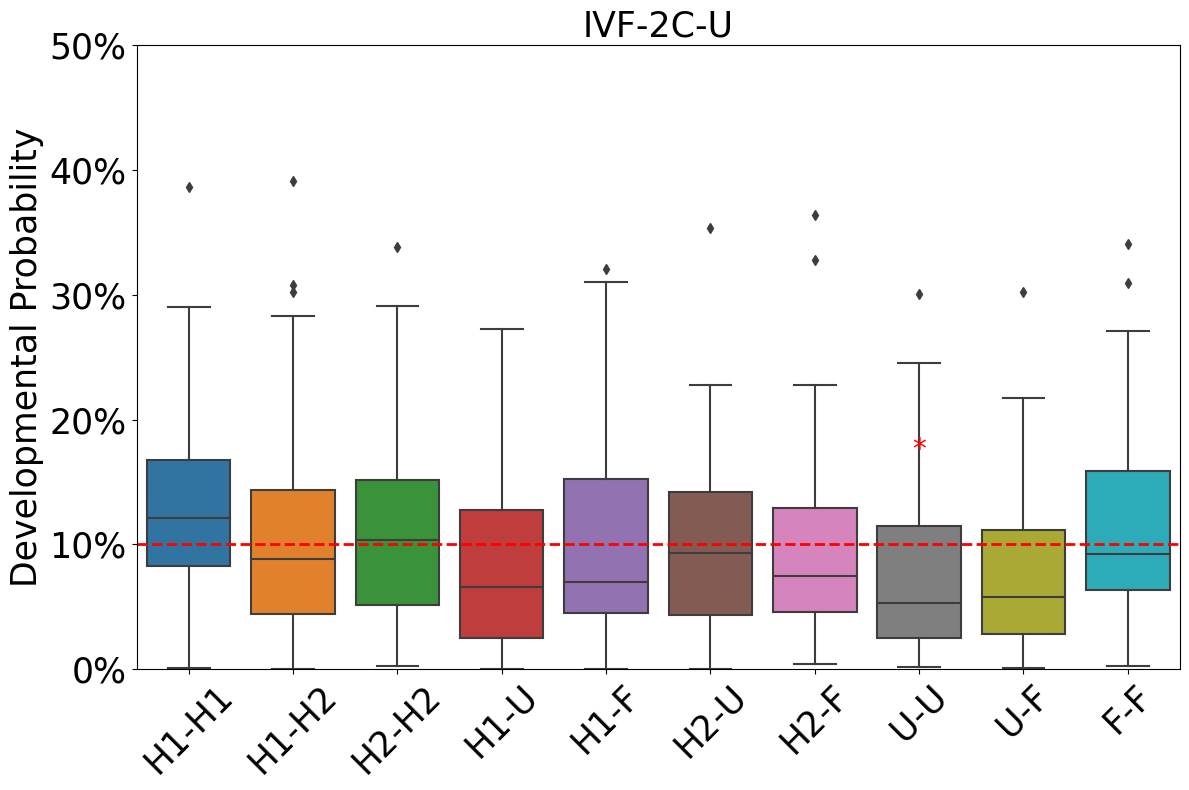

In [16]:
#4分类 IVF-2C-U
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# Load data
file_path = 'IVF-2C-U-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.1

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = data.columns.tolist()

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)
# 设置 y 轴为百分比
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('IVF-2C-U', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0, 0.5)  # 限制 y 轴范围为 0 到 0.5（即 0% 到 50%）

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.savefig('IVF_2C_U_Probability.svg', dpi=300, bbox_inches='tight', transparent=True)


Medians, deviations from random p-value, and significance for each category:
Category: F-F, Median: 0.0624, p-value (Z-test): 1.2413e-01 ()
Category: H1-F, Median: 0.1739, p-value (Z-test): 1.6313e-02 (*)
Category: H1-H1, Median: 0.1215, p-value (Z-test): 4.4431e-01 ()
Category: H1-H2, Median: 0.3028, p-value (Z-test): 1.5624e-08 (***)
Category: H1-U, Median: 0.0151, p-value (Z-test): 4.5589e-05 (***)
Category: H2-F, Median: 0.1215, p-value (Z-test): 4.4326e-01 ()
Category: H2-H2, Median: 0.1373, p-value (Z-test): 1.9744e-01 ()
Category: H2-U, Median: 0.0084, p-value (Z-test): 6.0805e-06 (***)
Category: U-F, Median: 0.0124, p-value (Z-test): 2.1065e-05 (***)
Category: U-U, Median: 0.0051, p-value (Z-test): 1.9998e-06 (***)


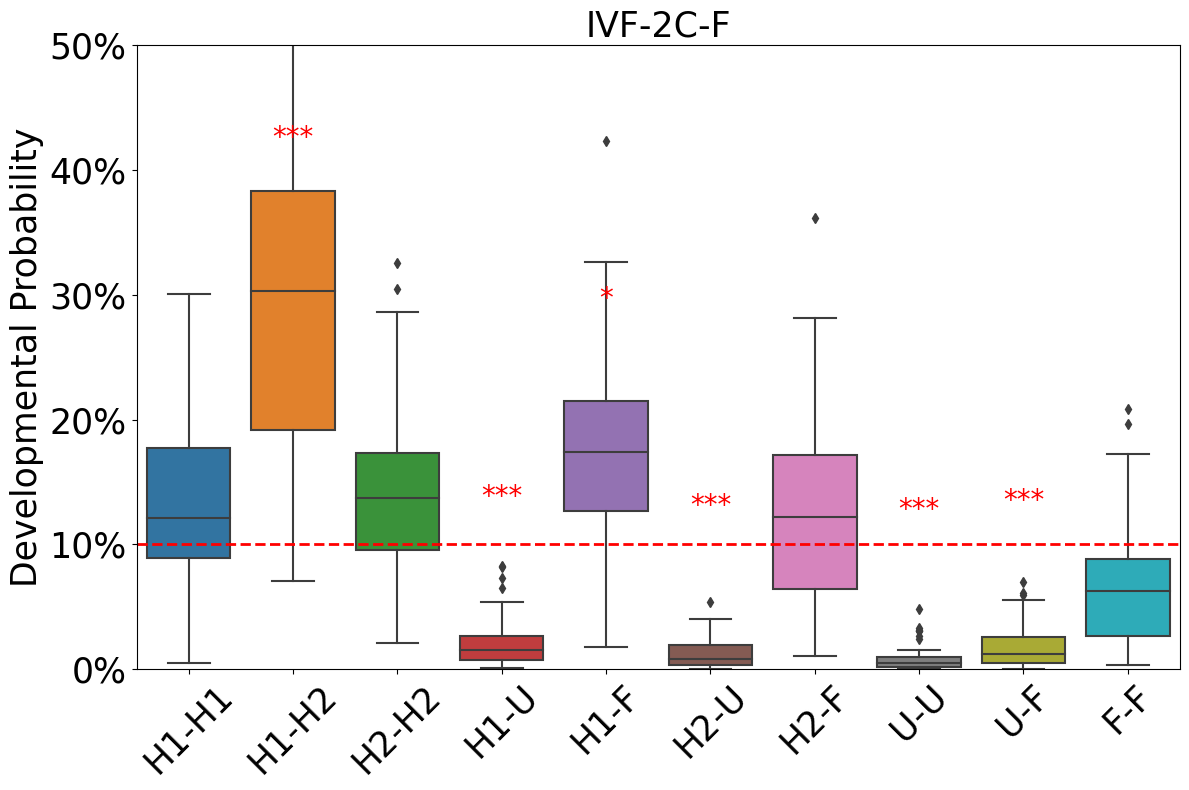

In [17]:
#4分类 IVF-2C-F
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# Load data
file_path = 'IVF-2C-F-p.txt'  # Replace with actual file path
data = pd.read_csv(file_path, sep='\t', index_col=0)

# Reshape data for plotting
data_melted = data.reset_index().melt(id_vars='id', var_name='categories', value_name='value')

# Calculate and print the median for each category, its deviation from random p-value, and significance
medians = data_melted.groupby('categories')['value'].median()

# Prepare a dictionary to store significance results for annotation
significance_dict = {}

print("Medians, deviations from random p-value, and significance for each category:")
random_p_value = 0.1

for category, median in medians.items():
    # Extract the values for this category
    values = data_melted[data_melted['categories'] == category]['value']
    
    # Perform a z-test for proportions against the random p-value (0.1)
    n = len(values)*5  # Sample size
    k = sum(values > random_p_value)  # Number of values greater than 0.1
    count = np.array([n*median, n*random_p_value])  # Count of successes and failures
    count_null = np.array([n, n])  # Expected counts under null hypothesis
    
    # Perform the z-test
    stat, p_value_ztest = proportions_ztest(count, count_null)
    
    # Determine significance
    significance = ""
    if p_value_ztest < 0.001:
        significance = "***"
    elif p_value_ztest < 0.01:
        significance = "**"
    elif p_value_ztest < 0.05:
        significance = "*"
    
    # Store the significance for later annotation
    significance_dict[category] = significance
    
    # Print results
    print(f"Category: {category}, Median: {median:.4f}, p-value (Z-test): {p_value_ztest:.4e} ({significance})")

# Define order based on the categories
category_order = data.columns.tolist()

# Plot boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='categories', y='value', data=data_melted, order=category_order)
# 设置 y 轴为百分比
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

# Add a red dashed line at y=0.1 to indicate the random p-value
plt.axhline(y=random_p_value, color='red', linestyle='--', linewidth=2)

# Set font size to 25 for all text elements
plt.title('IVF-2C-F', fontsize=25)
plt.ylabel('Developmental Probability', fontsize=25)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0, 0.5)  # 限制 y 轴范围为 0 到 0.5（即 0% 到 50%）

# Annotate significance stars above the boxes
for i, category in enumerate(category_order):
    significance = significance_dict.get(category, "")
    if significance:  # Only annotate if there is significance
        y = medians[category]  # Place the annotation at the median value
        ax.annotate(significance, 
                    xy=(i, y), 
                    xycoords='data', 
                    xytext=(0, 100),  # Offset from the median
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.savefig('IVF_2C_F_Probability.svg', dpi=300, bbox_inches='tight', transparent=True)
